<a href="https://colab.research.google.com/github/GiridurgaG/WorkBook/blob/main/Pandas_SQL_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [142]:
# Install pandas for data manipulation and pandasql for running SQL queries on pandas DataFrames
!pip install pandas pandasql

  Preparing metadata (setup.py) ... done
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26772 sha256=779ef17a250b33ebdfff7e4fe519f2db6206b59c689c2703d95e2fcc79d96780
  Stored in directory: /root/.cache/pip/wheels/68/5d/a5/edc271b998f909801d7956959f699b976cc9896075dc47c153
Successfully built pandasql


In [134]:
# Import Libraries
import pandas as pd
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt

In [135]:
# Load Dataset
df = pd.read_csv('/content/drive/MyDrive/WalmartSalesData.csv')

In [136]:
# Dataset First Look
df.head()

,Invoice_ID,Branch,City,Customer_type,Gender,Product_line,Unit_price,Quantity,Tax_5%,Total,Date,Time,Payment,cogs,gross_margin_percentage,gross_income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,05-01-2019,13:08:00,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,08-03-2019,10:29:00,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,03-03-2019,13:23:00,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,27-01-2019,20:33:00,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,08-02-2019,10:37:00,Ewallet,604.17,4.761905,30.2085,5.3


In [143]:
# Establish a connection to a SQLite database named 'Sales.db'.
# If the file doesn't exist, it will be created.
conn = sqlite3.connect('Sales.db')

# Write the DataFrame 'df' to a SQL table named 'Sales'.
# If the table already exists, it will be replaced.
# The DataFrame's index will not be written as a column in the table.
df.to_sql('Sales',conn,if_exists='replace', index=False)

# Close the database connection to free up resources.
conn.close()

In [144]:
# Connect to the SQLite database 'Sales.db'
conn = sqlite3.connect('Sales.db')

# Commit any pending transactions
conn.commit()

# Execute a SQL query to read all records from the 'Sales' table into a pandas DataFrame
users = pd.read_sql_query ('''SELECT * FROM Sales''',conn)

In [145]:
# Query the first 5 rows from the 'Sales' table
pd.read_sql_query ('''

SELECT * from Sales
LIMIT 5

''',conn)

,Invoice_ID,Branch,City,Customer_type,Gender,Product_line,Unit_price,Quantity,Tax_5%,Total,Date,Time,Payment,cogs,gross_margin_percentage,gross_income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,05-01-2019,13:08:00,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,08-03-2019,10:29:00,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,03-03-2019,13:23:00,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,27-01-2019,20:33:00,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,08-02-2019,10:37:00,Ewallet,604.17,4.761905,30.2085,5.3


In [141]:
# Number of Unique Cities and Branches
pd.read_sql_query ('''

SELECT DISTINCT City, Branch
FROM Sales

''',conn)

,City,Branch
0,Yangon,A
1,Naypyitaw,C
2,Mandalay,B


In [9]:
# Most selling product line
Top_selling_Product_Line = pd.read_sql_query ('''

SELECT Product_line, SUM(quantity) as Qty
FROM Sales
GROUP BY Product_line
ORDER BY Qty DESC

''',conn)
Top_selling_Product_Line

,Product_line,Qty
0,Electronic accessories,971
1,Food and beverages,952
2,Sports and travel,920
3,Home and lifestyle,911
4,Fashion accessories,902
5,Health and beauty,854


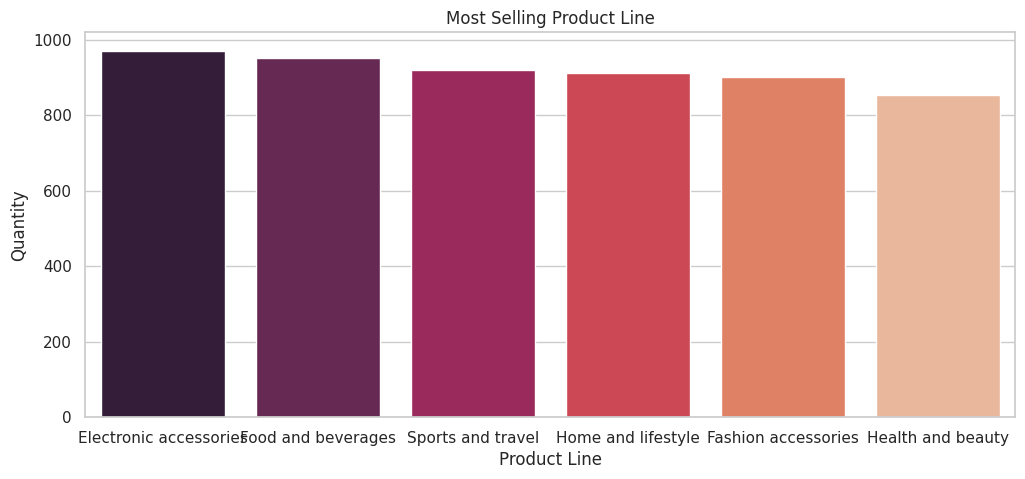

In [146]:
# Most Selling Product Line
Top_selling_Product_Line
# Visualization
plt.figure(figsize=(12,5))
sns.barplot(x='Product_line', y='Qty', data = Top_selling_Product_Line, hue = 'Product_line', legend = False, palette='rocket')
plt.title('Most Selling Product Line')
plt.xlabel('Product Line')
plt.ylabel('Quantity')
plt.show()

In [11]:
# Largest Revenue by Date
Revenue_by_Date = pd.read_sql_query ('''

SELECT Date, SUM(total) AS total_revenue
FROM Sales
GROUP BY Date
ORDER BY total_revenue desc
LIMIT 10

''',conn)
Revenue_by_Date

,Date,total_revenue
0,09-03-2019,7474.0470
1,07-02-2019,7228.2105
2,14-03-2019,7214.6340
3,15-02-2019,6830.7855
4,02-03-2019,6560.3055
5,05-03-2019,6230.8785
6,23-01-2019,5994.1875
7,15-01-2019,5944.2600
8,27-02-2019,5859.4515
9,19-03-2019,5740.3920


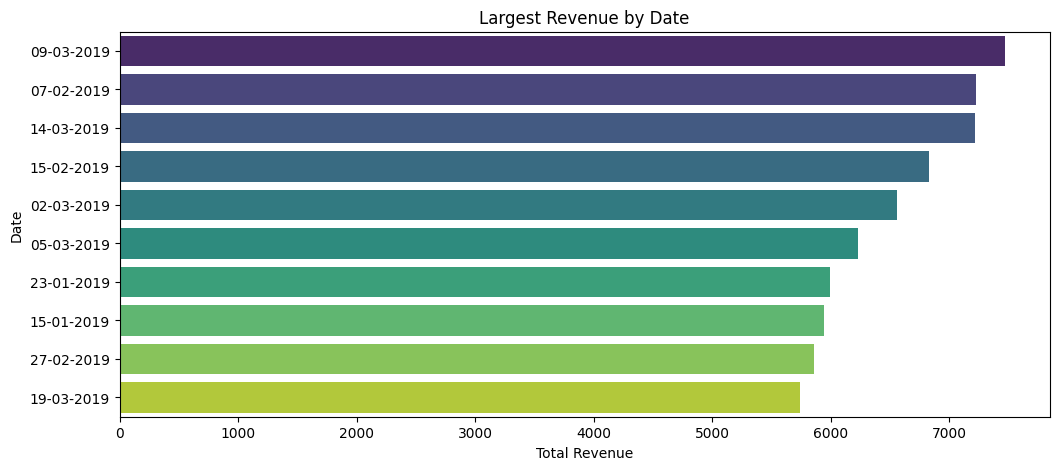

In [12]:
# Largest Revenue by Date
Revenue_by_Date
#Visualization
plt.figure(figsize=(12,5))
sns.barplot(x='total_revenue', y='Date', data = Revenue_by_Date, hue = 'Date', legend = False, palette='viridis')
plt.title('Largest Revenue by Date')
plt.xlabel('Total Revenue')
plt.ylabel('Date')
plt.show()

In [14]:
# Product line having largest revenue
PL_Revenue = pd.read_sql_query ('''

SELECT Product_line, SUM(total) as total_revenue
FROM Sales
GROUP BY Product_line
ORDER BY total_revenue DESC

''',conn)
PL_Revenue

,Product_line,total_revenue
0,Food and beverages,56144.8440
1,Sports and travel,55122.8265
2,Electronic accessories,54337.5315
3,Fashion accessories,54305.8950
4,Home and lifestyle,53861.9130
5,Health and beauty,49193.7390


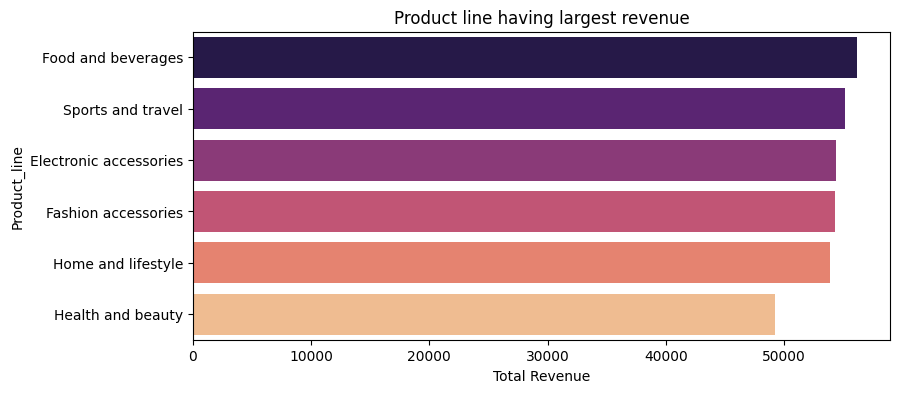

In [23]:
# Product line having largest revenue
PL_Revenue
#Visualization
plt.figure(figsize=(9,4))
sns.barplot(x='total_revenue', y='Product_line', data = PL_Revenue, hue = 'Product_line', legend = False, palette='magma')
plt.title('Product line having largest revenue')
plt.xlabel('Total Revenue')
plt.ylabel('Product_line')
plt.show()

In [24]:
# City with largest revenue
City_by_Revenue = pd.read_sql_query ('''

SELECT Branch, City, SUM(total) AS total_revenue
FROM Sales
GROUP BY City, Branch
ORDER BY total_revenue

''',conn)
City_by_Revenue

,Branch,City,total_revenue
0,B,Mandalay,106197.6720
1,A,Yangon,106200.3705
2,C,Naypyitaw,110568.7065


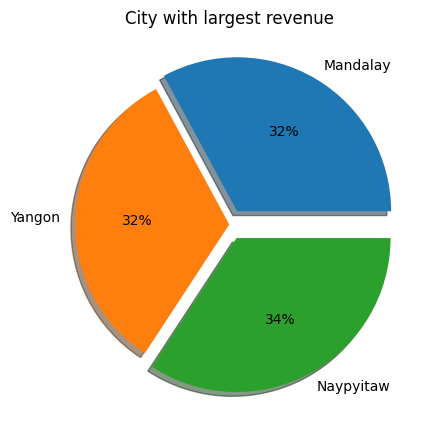

In [25]:
# City with largest revenue
City_by_Revenue
# Visualization
plt.figure(figsize=(12,5))
plt.title('City with largest revenue')
plt.pie(City_by_Revenue['total_revenue'], labels=City_by_Revenue['City'], autopct="%1i%%",explode=(0.1, 0, 0.1), shadow=True)
plt.show()

In [37]:
# Most common product line by gender
PL_by_Gender = pd.read_sql_query ('''

SELECT Product_line, Gender, COUNT(Gender) AS total_count
FROM Sales
GROUP BY Gender, Product_line
ORDER BY total_count DESC

''',conn)
PL_by_Gender

,Product_line,Gender,total_count
0,Fashion accessories,Female,96
1,Food and beverages,Female,90
2,Sports and travel,Female,88
3,Health and beauty,Male,88
4,Electronic accessories,Male,86
5,Electronic accessories,Female,84
6,Food and beverages,Male,84
7,Fashion accessories,Male,82
8,Home and lifestyle,Male,81
9,Home and lifestyle,Female,79


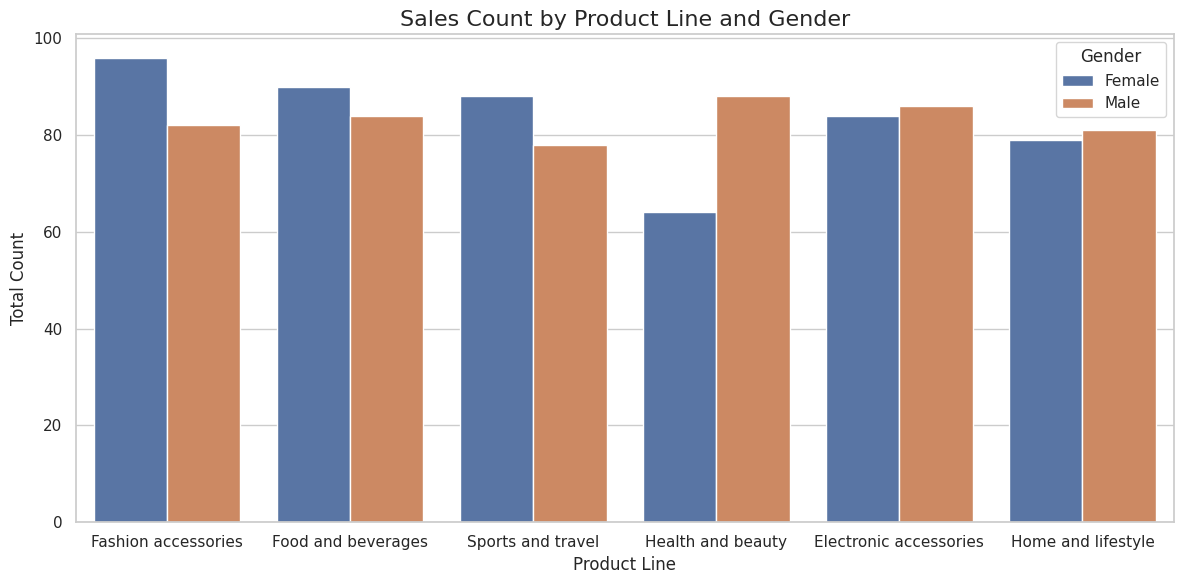

In [55]:
# Most common product line by gender
PL_by_Gender

# Create grouped bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=PL_by_Gender, x='Product_line', y='total_count', hue='Gender')

# Customize plot
plt.title('Sales Count by Product Line and Gender', fontsize=16)
plt.xlabel('Product Line', fontsize=12)
plt.ylabel('Total Count', fontsize=12)
plt.legend(title='Gender')
plt.tight_layout()

# Show plot
plt.show()

In [56]:
# Average rating of each product line
Rating_for_PL = pd.read_sql_query ('''

SELECT Product_line, ROUND(AVG(rating), 2) as avg_rating
FROM Sales
GROUP BY Product_line
ORDER BY avg_rating DESC

''',conn)
Rating_for_PL

,Product_line,avg_rating
0,Food and beverages,7.11
1,Fashion accessories,7.03
2,Health and beauty,7.00
3,Sports and travel,6.92
4,Electronic accessories,6.92
5,Home and lifestyle,6.84


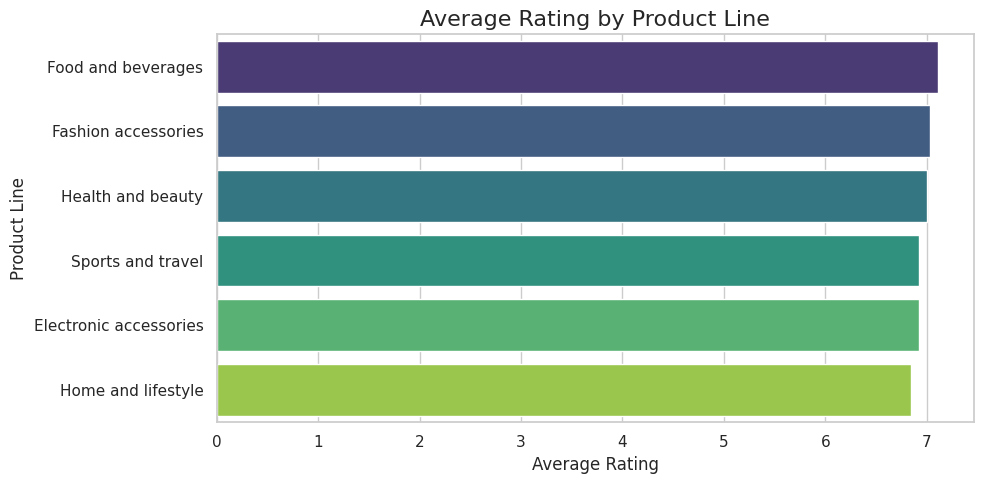

In [63]:
# Average Rating by Product Line
Rating_for_PL
# Create horizontal bar chart
plt.figure(figsize=(10, 5))
sns.barplot(data=Rating_for_PL, x='avg_rating', y='Product_line', hue = 'Product_line', palette='viridis')

# Customize
plt.title('Average Rating by Product Line', fontsize=16)
plt.xlabel('Average Rating', fontsize=12)
plt.ylabel('Product Line', fontsize=12)
plt.tight_layout()

# Show plot
plt.show()

In [64]:
# Most common customer type
Common_Customer_type = pd.read_sql_query ('''

SELECT Customer_type, count(*) as Count
FROM Sales
GROUP BY Customer_type
ORDER BY Count DESC

''',conn)
Common_Customer_type

,Customer_type,Count
0,Member,501
1,Normal,499


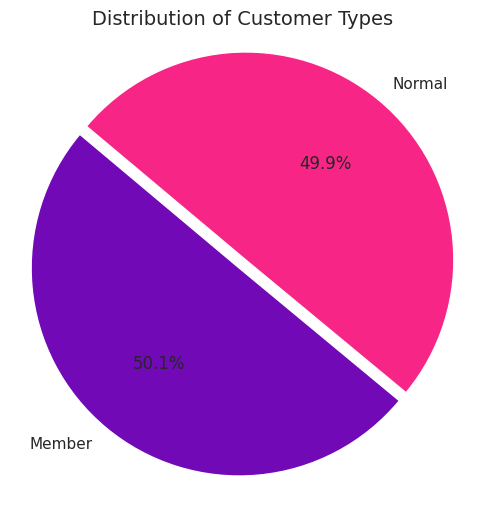

In [71]:
# Distribution of Customer Types
Common_Customer_type
# Plot
plt.figure(figsize=(6, 6))
plt.pie(Common_Customer_type['Count'], labels = Common_Customer_type['Customer_type'], autopct='%1.1f%%', colors=['#7209B7', '#F72585'], startangle=140, explode=(0.05, 0))
plt.title('Distribution of Customer Types', fontsize=14)
plt.axis('equal')  # Equal aspect ratio ensures pie is a circle

# Show
plt.show()

In [73]:
# Customer types with Total revenue
Revenue_by_Customer_type = pd.read_sql_query ('''

SELECT Customer_type, SUM(Total) AS total_revenue
FROM Sales
GROUP BY Customer_type
ORDER BY total_revenue

''',conn)
Revenue_by_Customer_type

,Customer_type,total_revenue
0,Normal,158743.305
1,Member,164223.444


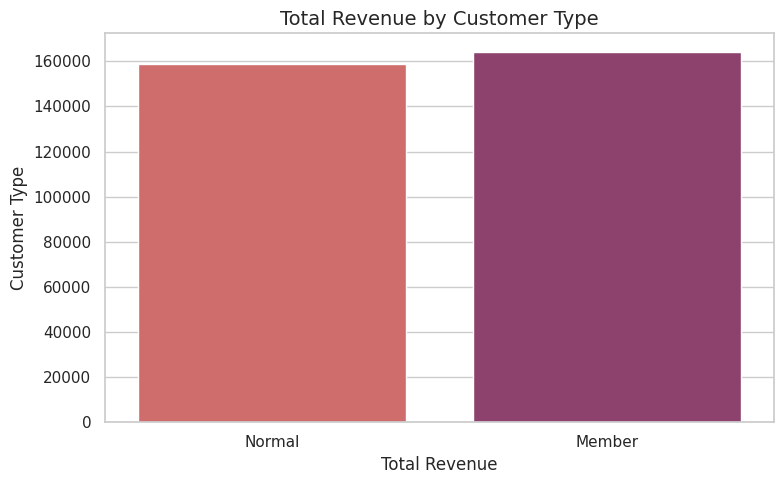

In [80]:
# Total Revenue by Customer Type
Revenue_by_Customer_type
# Plot
plt.figure(figsize=(8, 5))
sns.barplot(data=Revenue_by_Customer_type, y='total_revenue', x='Customer_type', hue = 'Customer_type', palette='flare')

# Customize
plt.title('Total Revenue by Customer Type', fontsize=14)
plt.xlabel('Total Revenue', fontsize=12)
plt.ylabel('Customer Type', fontsize=12)
plt.tight_layout()

# Show
plt.show()

In [86]:
# Payment Methods Count
Payment_methods = pd.read_sql_query ('''

SELECT Payment, Count(*) as Count
FROM Sales
GROUP BY Payment
ORDER BY Count

''',conn)
Payment_methods

,Payment,Count
0,Credit card,311
1,Cash,344
2,Ewallet,345


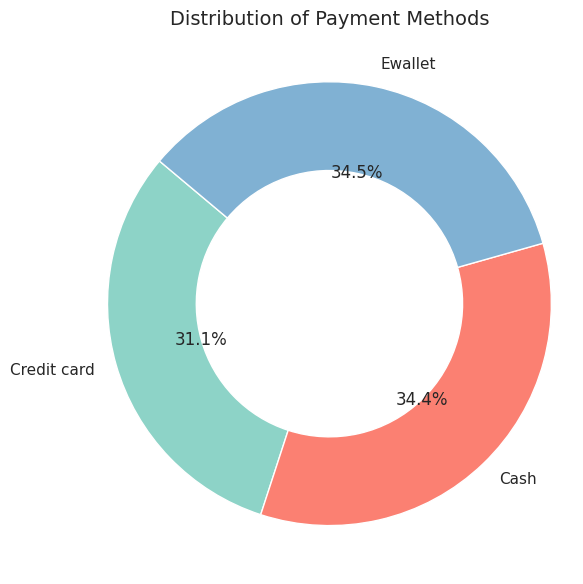

In [95]:
# Distribution of Payment Methods
Payment_methods
# Plot
plt.figure(figsize=(6, 6))
plt.pie(
    Payment_methods['Count'],
    labels=Payment_methods['Payment'],
    autopct='%1.1f%%',
    startangle=140,
    colors=['#8dd3c7', '#fb8072', '#80b1d3'],
    wedgeprops=dict(width=0.4)  # Donut effect
)

plt.title('Distribution of Payment Methods', fontsize=14)
plt.axis('equal')  # Ensure circle shape
plt.tight_layout()
plt.show()

In [99]:
# Total Cost of Goods sold for each Product Line
Cogs_PL = pd.read_sql_query ('''

SELECT Product_line, SUM(Cogs) as Total_COGS
FROM Sales
GROUP BY Product_line
ORDER BY Total_COGS DESC

''',conn)
Cogs_PL

,Product_line,Total_COGS
0,Food and beverages,53471.28
1,Sports and travel,52497.93
2,Electronic accessories,51750.03
3,Fashion accessories,51719.90
4,Home and lifestyle,51297.06
5,Health and beauty,46851.18


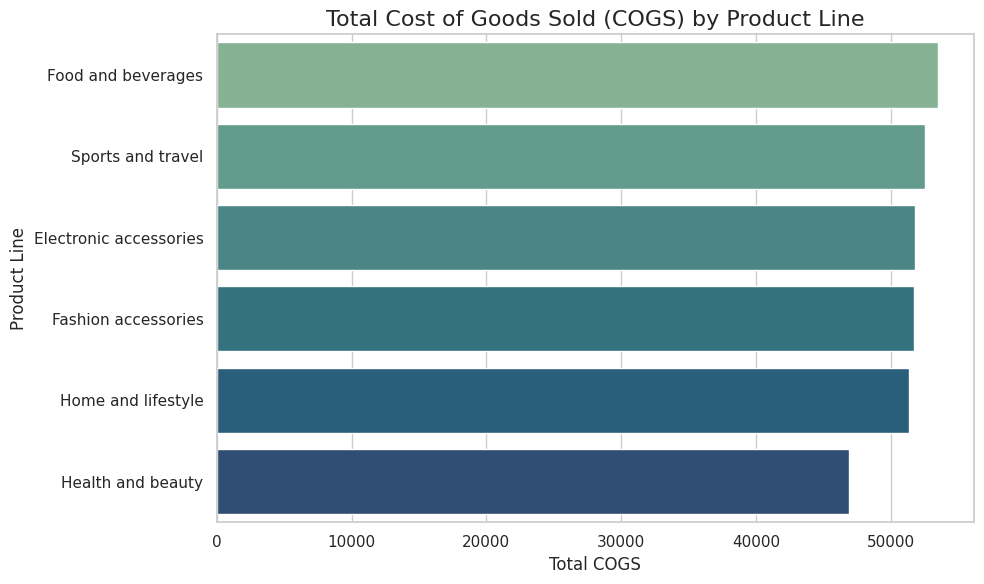

In [104]:
# Total Cost of Goods Sold (COGS) by Product Line
Cogs_PL
# visulaization
plt.figure(figsize=(10, 6))
sns.barplot(
    data=Cogs_PL,
    x='Total_COGS',
    y='Product_line', hue = 'Product_line',
    palette='crest'
)

# Customize
plt.title('Total Cost of Goods Sold (COGS) by Product Line', fontsize=16)
plt.xlabel('Total COGS', fontsize=12)
plt.ylabel('Product Line', fontsize=12)
plt.tight_layout()

# Show
plt.show()

In [ ]:
df.columns

Index(['Invoice_ID', 'Branch', 'City', 'Customer_type', 'Gender',
       'Product_line', 'Unit_price', 'Quantity', 'Tax_5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross_margin_percentage', 'gross_income',
       'Rating'],
      dtype='object')

In [132]:
running_total_df = pd.read_sql_query('''
SELECT Date, Total,
       SUM(Total) OVER(ORDER BY Date) AS Running_Total
FROM Sales
limit 300
''', conn)
running_total_df

,Date,Total,Running_Total
0,01-01-2019,457.443,4745.1810
1,01-01-2019,399.756,4745.1810
2,01-01-2019,470.673,4745.1810
3,01-01-2019,388.290,4745.1810
4,01-01-2019,132.762,4745.1810
...,...,...,...
295,09-02-2019,472.311,96536.3385
296,09-02-2019,256.410,96536.3385
297,09-02-2019,233.520,96536.3385
298,09-02-2019,66.402,96536.3385


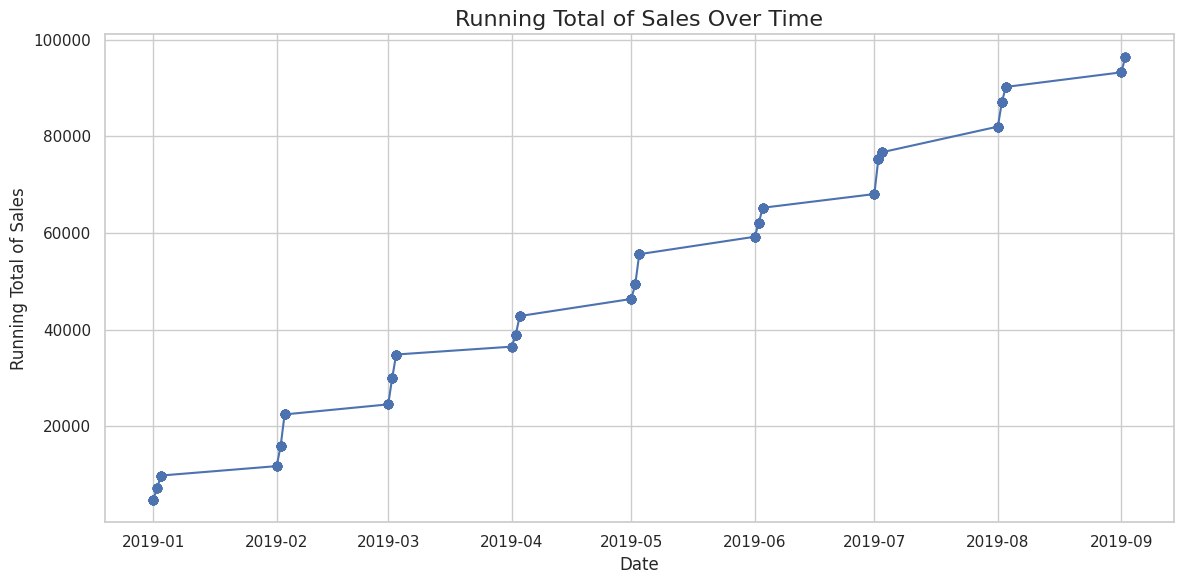

In [133]:
# Convert Date column to datetime
running_total_df['Date'] = pd.to_datetime(running_total_df['Date'])

# Plot running total over time
plt.figure(figsize=(12, 6))
plt.plot(running_total_df['Date'], running_total_df['Running_Total'], marker='o', linestyle='-')
plt.title('Running Total of Sales Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Running Total of Sales', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()